Trabalho referente a disciplina de TECNOLOGIAS PARA DATASCIENCE, ministrada pela Professora Dr Carolina Ribeiro Xavier no curso de Ciência da Computação - UFSJ

Este trabalho tem como objetivo analisar um pouco o crescimento e espalhamento de casos do Covid pelo Brasil,seus óbitos, e fazer um paralelo com a quantidade de pessoas vacinadas no ano de 2021.
Os dados foram retirados de 2 sites diferentes e ambos os dados foram baixados no dia 05/ago/21.

**Covid**: https://covid.saude.gov.br/


**Vacinas**: https://qsprod.saude.gov.br/extensions/DEMAS_C19Vacina/DEMAS_C19Vacina.html

Dos arquivos baixados, apenas o arquio de vacinas foi alterado, tendo trocado a formatação dos números, sendo retirado as ',' dos números e das datas, trocando a ordem dos dias com dos meses, para manter a formatação de datas apresentada nos arquivos do Covid.

**BIBLIOTECAS**

Todas as bibliotecas utilizadas no trabalho foram as:

.Pandas

.Matplotlib

.Numpy

.DateTime

.Folium

.json

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import folium
import json

Os arquivos do covid são divididos em 4 pelo site, sendo 2 arquivos referente aos dados do ano de 2020 e 2 para o ano de 2021, sendo todos no formato de csv tend ';' como separador.
Então criamos uma tabela para cada arquivo e depois juntamos todas elas em uma mesma tabela.

**TABELAS COVID**

In [2]:
dir_dataset = "/home/yan/Downloads/DataScience_TP/datasets/HIST_PAINEL_COVIDBR_2020_Parte1_05ago2021.csv"
tabela1 = pd.read_csv(dir_dataset, sep=";")

dir_dataset = "/home/yan/Downloads/DataScience_TP/datasets/HIST_PAINEL_COVIDBR_2020_Parte2_05ago2021.csv"
tabela2 = pd.read_csv(dir_dataset,sep=";")

dir_dataset = "/home/yan/Downloads/DataScience_TP/datasets/HIST_PAINEL_COVIDBR_2021_Parte1_05ago2021.csv"
tabela3 = pd.read_csv(dir_dataset,sep=";")

dir_dataset = "/home/yan/Downloads/DataScience_TP/datasets/HIST_PAINEL_COVIDBR_2021_Parte2_05ago2021.csv"
tabela4 = pd.read_csv(dir_dataset,sep=";")

**TABELAS VACINAS**

A tabela de Vacinas teve as alterações como citado anteriormente, além de poder baixar tabelas personalizadas no site, podendo baixar tabelas já filtradas por regiões, faixa de idade, doses ministradas, entre outras tabelas disponibilizadas.
A tabela utilizada no trabalho, apenas contém a quantidade de Vacinas ministradas em cada data respectivamente.

In [3]:
dir_dataset = "/home/yan/Downloads/DataScience_TP/datasets/vacinas_aplicadas.csv"
vacinados = pd.read_csv(dir_dataset,sep=",")

**UNIR TABELAS**

In [4]:
tabela_final = pd.merge(tabela1, tabela2, how = "outer")
tabela_final = pd.merge(tabela_final, tabela3, how = "outer")
tabela_final = pd.merge(tabela_final, tabela4, how = "outer")

A tabela de Covid contém as seguintes informações:

.Região

.Estado

.Municipio

.Código UF

.Código Municipio

.Código da Região de Sáude

.Nome da Região de Saúde

.Data

.SemanaEpi

.População

.Casos Acumulados

.Casos Novos

.Óbitos Acumulados

.Óbitos Novos

.Pessoas Recuperadas

.Casos em Acompanhamento

.Região de Interior/Metropolitana

Porém apenas utilizamos as seguintes informações e retiramos as colunas restantes:

.Região

.Estado

.Municipio

.Data

.População

.Casos Novos

.Óbitos novos

In [5]:
tabela_final

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793506,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-08-01,31,3015268.0,450865.0,699,9630,10,NaN,NaN,1.0
2793507,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-08-02,31,3015268.0,451570.0,705,9644,14,NaN,NaN,1.0
2793508,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-08-03,31,3015268.0,451894.0,324,9661,17,NaN,NaN,1.0
2793509,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-08-04,31,3015268.0,452527.0,633,9677,16,NaN,NaN,1.0


In [6]:
tabela_final = tabela_final.drop(columns=['coduf','codmun','codRegiaoSaude','nomeRegiaoSaude','semanaEpi','casosAcumulado','obitosAcumulado','emAcompanhamentoNovos','interior/metropolitana','Recuperadosnovos'])

In [7]:
tabela_final

,regiao,estado,municipio,data,populacaoTCU2019,casosNovos,obitosNovos
0,Brasil,NaN,NaN,2020-02-25,210147125.0,0,0
1,Brasil,NaN,NaN,2020-02-26,210147125.0,1,0
2,Brasil,NaN,NaN,2020-02-27,210147125.0,0,0
3,Brasil,NaN,NaN,2020-02-28,210147125.0,0,0
4,Brasil,NaN,NaN,2020-02-29,210147125.0,1,0
...,...,...,...,...,...,...,...
2793506,Centro-Oeste,DF,Brasília,2021-08-01,3015268.0,699,10
2793507,Centro-Oeste,DF,Brasília,2021-08-02,3015268.0,705,14
2793508,Centro-Oeste,DF,Brasília,2021-08-03,3015268.0,324,17
2793509,Centro-Oeste,DF,Brasília,2021-08-04,3015268.0,633,16


In [8]:
vacinados

,data,dosesAplicadas
0,01/17/2021,323087
1,01/18/2021,2333
2,01/19/2021,61541
3,01/20/2021,349583
4,01/21/2021,390009
...,...,...
196,08/01/2021,107443
197,08/02/2021,1110043
198,08/03/2021,1208491
199,08/04/2021,1039805


**PRE-PROCESSAMENTO**

RETIRADA DE VALORES NEGATIVOS

In [9]:
indexNames = tabela_final[ tabela_final['casosNovos'] < 0 ].index
tabela_final.drop(indexNames , inplace=True)

indexNames = tabela_final[ tabela_final['obitosNovos'] < 0 ].index
tabela_final.drop(indexNames , inplace=True)

RETIRADA DA REGIÃO 'BRASIL' PARA AVALIAR REGIÃO POR REGIÃO POR CONFLITO DE VALORES

In [10]:
indexNames = tabela_final[ tabela_final['regiao'] == 'Brasil' ].index
tabela_final.drop(indexNames , inplace=True)

CONVERTENDO O TIPO DE DADO DA COLUNA 'DATA' DE 'STRING/OBJECT' PARA 'DATA' DEFINIDO PELO PANDAS

In [11]:
tabela_final['data'] = tabela_final['data'].astype('object')
tabela_final['data'] = pd.to_datetime(tabela_final['data'])

vacinados['data'] = vacinados['data'].astype('object')
vacinados['data'] = pd.to_datetime(vacinados['data'])

RETIRADA DE LINHAS COM OS VALORES 'NaN' NA COLUNA DE 'MUNICIPIO' 

In [12]:
tabela_final = tabela_final[tabela_final['municipio'].notna()]

SEPARANDO A BASE EM 2020 E 2021

In [13]:
date1 = pd.to_datetime("2021-01-01")

tabela_2020 = tabela_final['data'] < date1
tabela_2020 = tabela_final[tabela_2020]

tabela_2021 = tabela_final['data'] >= date1
tabela_2021 = tabela_final[tabela_2021]

SUBDIVIDINDO AS TABELAS EM CADA REGIÃO DO PAÍS

In [14]:
tabela_2020_Norte = tabela_2020['regiao'] == 'Norte'
tabela_2020_Norte = tabela_2020[tabela_2020_Norte]

tabela_2021_Norte = tabela_2021['regiao'] == 'Norte'
tabela_2021_Norte = tabela_2021[tabela_2021_Norte]

In [15]:
tabela_2020_Nordeste = tabela_2020['regiao'] == 'Nordeste'
tabela_2020_Nordeste = tabela_2020[tabela_2020_Nordeste]

tabela_2021_Nordeste = tabela_2021['regiao'] == 'Nordeste'
tabela_2021_Nordeste = tabela_2021[tabela_2021_Nordeste]

In [16]:
tabela_2020_Sudeste = tabela_2020['regiao'] == 'Sudeste'
tabela_2020_Sudeste = tabela_2020[tabela_2020_Sudeste]

tabela_2021_Sudeste = tabela_2021['regiao'] == 'Sudeste'
tabela_2021_Sudeste = tabela_2021[tabela_2021_Sudeste]

In [17]:
tabela_2020_Sul = tabela_2020['regiao'] == 'Sul'
tabela_2020_Sul = tabela_2020[tabela_2020_Sul]

tabela_2021_Sul = tabela_2021['regiao'] == 'Sul'
tabela_2021_Sul = tabela_2021[tabela_2021_Sul]

In [18]:
tabela_2020_Centro_Oeste = tabela_2020['regiao'] == 'Centro-Oeste'
tabela_2020_Centro_Oeste = tabela_2020[tabela_2020_Centro_Oeste]

tabela_2021_Centro_Oeste = tabela_2021['regiao'] == 'Centro-Oeste'
tabela_2021_Centro_Oeste = tabela_2021[tabela_2021_Centro_Oeste]

CRIA UMA TABELA COM TODOS OS ESTADOS DO PAÍS COM A QUANTIDADE DE CASOS NOVOS NO ANO E SUA TAXA

In [19]:
tabela_estados_20 = tabela_2020.drop_duplicates(subset=['estado'])

tabela_estados_20 = tabela_estados_20.reset_index()

In [20]:
n = 0
string1 = tabela_estados_20['estado'][n]

aux = tabela_2020['estado'] == string1 
aux = tabela_2020[aux]
aux2 = aux.groupby(aux['estado'])['casosNovos'].sum()
aux2_1 = aux.groupby(aux['estado'])['obitosNovos'].sum()

aux3 = aux.drop_duplicates(subset=['municipio'])
aux3 = aux3.groupby(aux3["data"].dt.year)['populacaoTCU2019'].sum()

data = {'estado':[tabela_estados_20['estado'][n]],'casosNovos':[aux2.values[0]],'logCasosNovos':[np.log(aux2.values[0])],'obitosNovos':[aux2_1.values[0]],'logObitosNovos':[np.log(aux2_1.values[0])],'populacaoTCU2019':[aux3.values[0]],'taxa_casos':[(aux2.values[0]/aux3.values[0])*100]}
tabela_estados_casos_20 = pd.DataFrame(data)

n = 1
while n < tabela_estados_20['estado'].size:
    string1 = tabela_estados_20['estado'][n]
    
    aux3 = tabela_2020['estado'] == string1 
    aux3 = tabela_2020[aux3]
    aux4 = aux3.groupby(aux3["estado"])['casosNovos'].sum()
    aux4_1 = aux3.groupby(aux3["estado"])['obitosNovos'].sum()
    
    aux5 = aux3.drop_duplicates(subset=['municipio'])
    aux5 = aux5.groupby(aux5["data"].dt.year)['populacaoTCU2019'].sum()
    
    data = {'estado':[tabela_estados_20['estado'][n]],'casosNovos':[aux4.values[0]],'logCasosNovos':[np.log(aux4.values[0])],'obitosNovos':[aux4_1.values[0]],'logObitosNovos':[np.log(aux4_1.values[0])],'populacaoTCU2019':[aux5.values[0]],'taxa_casos':[(aux4.values[0]/aux5.values[0])*100]}
    aux6 = pd.DataFrame(data)
    tabela_estados_casos_20 = pd.merge(tabela_estados_casos_20, aux6, how = "outer") 
    
    n = n + 1

In [21]:
tabela_estados_21 = tabela_2021.drop_duplicates(subset=['estado'])

tabela_estados_21 = tabela_estados_21.reset_index()

In [22]:
n = 0
string1 = tabela_estados_21['estado'][n]

aux = tabela_2021['estado'] == string1 
aux = tabela_2021[aux]
aux2 = aux.groupby(aux['estado'])['casosNovos'].sum()
aux2_1 = aux.groupby(aux['estado'])['obitosNovos'].sum()

aux3 = aux.drop_duplicates(subset=['municipio'])
aux3 = aux3.groupby(aux3["data"].dt.year)['populacaoTCU2019'].sum()

data = {'estado':[tabela_estados_21['estado'][n]],'casosNovos':[aux2.values[0]],'logCasosNovos':[np.log(aux2.values[0])],'obitosNovos':[aux2_1.values[0]],'logObitosNovos':[np.log(aux2_1.values[0])],'populacaoTCU2019':[aux3.values[0]],'taxa_casos':[(aux2.values[0]/aux3.values[0])*100]}
tabela_estados_casos_21 = pd.DataFrame(data)

n = 1
while n < tabela_estados_21['estado'].size:
    string1 = tabela_estados_21['estado'][n]
    
    aux3 = tabela_2021['estado'] == string1 
    aux3 = tabela_2021[aux3]
    aux4 = aux3.groupby(aux3["estado"])['casosNovos'].sum()
    aux4_1 = aux3.groupby(aux3["estado"])['obitosNovos'].sum()
    
    aux5 = aux3.drop_duplicates(subset=['municipio'])
    aux5 = aux5.groupby(aux5["data"].dt.year)['populacaoTCU2019'].sum()
    
    data = {'estado':[tabela_estados_21['estado'][n]],'casosNovos':[aux4.values[0]],'logCasosNovos':[np.log(aux4.values[0])],'obitosNovos':[aux4_1.values[0]],'logObitosNovos':[np.log(aux4_1.values[0])],'populacaoTCU2019':[aux5.values[0]],'taxa_casos':[(aux4.values[0]/aux5.values[0])*100]}
    aux6 = pd.DataFrame(data)
    tabela_estados_casos_21 = pd.merge(tabela_estados_casos_21, aux6, how = "outer") 

    n = n + 1

In [23]:
tabela_estados_casos_20

,estado,casosNovos,logCasosNovos,obitosNovos,logObitosNovos,populacaoTCU2019,taxa_casos
0,RO,96074,11.472874,1848,7.521859,1777225.0,5.405843
1,AC,41801,10.640676,798,6.682109,881935.0,4.739692
2,AM,201163,12.211871,5343,8.583543,4144597.0,4.853620
3,RR,66716,11.108200,795,6.678342,605761.0,11.013585
4,PA,292467,12.586107,7442,8.914895,8602865.0,3.399647
5,AP,68202,11.130229,925,6.829794,845731.0,8.064266
6,TO,90668,11.414960,1387,7.234898,1572866.0,5.764509
7,MA,201730,12.214685,4494,8.410498,7075181.0,2.851234
8,PI,143495,11.874055,2840,7.951559,3273227.0,4.383900
9,CE,326345,12.695710,10680,9.276128,9132078.0,3.573612


In [24]:
tabela_estados_casos_21

,estado,casosNovos,logCasosNovos,obitosNovos,logObitosNovos,populacaoTCU2019,taxa_casos
0,RO,164688,12.011808,4591,8.431853,1777225.0,9.266581
1,AC,46078,10.738091,979,6.886532,881935.0,5.224648
2,AM,218445,12.294290,8277,9.021236,4144597.0,5.270597
3,RR,50994,10.839463,1097,7.000334,605761.0,8.418172
4,PA,280500,12.544329,8965,9.101083,8602865.0,3.260542
5,AP,53446,10.886427,992,6.899723,845731.0,6.319503
6,TO,123872,11.727004,2724,7.909857,1572866.0,7.875560
7,MA,152092,11.932241,6122,8.719644,7075181.0,2.149655
8,PI,167870,12.030945,4061,8.309185,3273227.0,5.128578
9,CE,594105,13.294811,13485,9.509333,9132078.0,6.505693


AGRUPA NO ANO DE 2020 A QUANTIDADE DE CASOS NOVOS DE CADA REGIÃO DO PAÍS

In [25]:
agrupamento20_Norte = tabela_2020_Norte.groupby(tabela_2020_Norte["data"].dt.year)['casosNovos'].sum()
agrupamento20_Nordeste = tabela_2020_Nordeste.groupby(tabela_2020_Nordeste["data"].dt.year)['casosNovos'].sum()
agrupamento20_Sudeste = tabela_2020_Sudeste.groupby(tabela_2020_Sudeste["data"].dt.year)['casosNovos'].sum()
agrupamento20_Sul = tabela_2020_Sul.groupby(tabela_2020_Sul["data"].dt.year)['casosNovos'].sum()
agrupamento20_Centro_Oeste = tabela_2020_Centro_Oeste.groupby(tabela_2020_Centro_Oeste["data"].dt.year)['casosNovos'].sum()

AGRUPA NO ANO DE 2021 A QUANTIDADE DE CASOS NOVOS DE CADA REGIÃO DO PAÍS

In [26]:
agrupamento21_Norte = tabela_2021_Norte.groupby(tabela_2021_Norte["data"].dt.year)['casosNovos'].sum()
agrupamento21_Nordeste = tabela_2021_Nordeste.groupby(tabela_2021_Nordeste["data"].dt.year)['casosNovos'].sum()
agrupamento21_Sudeste = tabela_2021_Sudeste.groupby(tabela_2021_Sudeste["data"].dt.year)['casosNovos'].sum()
agrupamento21_Sul = tabela_2021_Sul.groupby(tabela_2021_Sul["data"].dt.year)['casosNovos'].sum()
agrupamento21_Centro_Oeste = tabela_2021_Centro_Oeste.groupby(tabela_2021_Centro_Oeste["data"].dt.year)['casosNovos'].sum()

FILTRANDO O VALOR DA POPULAÇÃO RESPECTIVAMENTE DE CADA REGIÃO

In [27]:
tabela_aux_NT = tabela_2021_Norte
tabela_aux_ND = tabela_2021_Nordeste
tabela_aux_SD = tabela_2021_Sudeste
tabela_aux_S = tabela_2021_Sul
tabela_aux_CO = tabela_2021_Centro_Oeste

In [28]:
tabela_aux_NT = tabela_aux_NT.drop_duplicates(subset=['municipio'])
tabela_aux_ND = tabela_aux_ND.drop_duplicates(subset=['municipio'])
tabela_aux_SD = tabela_aux_SD.drop_duplicates(subset=['municipio'])
tabela_aux_S = tabela_aux_S.drop_duplicates(subset=['municipio'])
tabela_aux_CO = tabela_aux_CO.drop_duplicates(subset=['municipio'])

In [29]:
pop_NT = tabela_aux_NT.groupby(tabela_aux_NT["data"].dt.year)['populacaoTCU2019'].sum()
pop_ND = tabela_aux_ND.groupby(tabela_aux_ND["data"].dt.year)['populacaoTCU2019'].sum()
pop_SD = tabela_aux_SD.groupby(tabela_aux_SD["data"].dt.year)['populacaoTCU2019'].sum()
pop_S = tabela_aux_S.groupby(tabela_aux_S["data"].dt.year)['populacaoTCU2019'].sum()
pop_CO = tabela_aux_CO.groupby(tabela_aux_CO["data"].dt.year)['populacaoTCU2019'].sum()

POPULAÇÃO DAS REGIÕES

In [30]:
pop_R = pd.Series([pop_NT.values[0],pop_ND.values[0],pop_SD.values[0],pop_S.values[0],pop_CO.values[0]])

POPULAÇÃO DO BRASIL

In [31]:
pop_B = pop_NT.values[0] + pop_ND.values[0] + pop_SD.values[0] + pop_S.values[0] + pop_CO.values[0]

INDICE DE CASOS NOVOS

In [32]:
indice_casos_novos_20 = pd.Series([(agrupamento20_Norte.values[0]/pop_NT.values[0])*100,(agrupamento20_Nordeste.values[0]/pop_ND.values[0])*100,(agrupamento20_Sudeste.values[0]/pop_SD.values[0])*100,(agrupamento20_Sul.values[0]/pop_S.values[0])*100,(agrupamento20_Centro_Oeste.values[0]/pop_CO.values[0])*100])

indice_casos_novos_21 = pd.Series([(agrupamento21_Norte.values[0]/pop_NT.values[0])*100,(agrupamento21_Nordeste.values[0]/pop_ND.values[0])*100,(agrupamento21_Sudeste.values[0]/pop_SD.values[0])*100,(agrupamento21_Sul.values[0]/pop_S.values[0])*100,(agrupamento21_Centro_Oeste.values[0]/pop_CO.values[0])*100])

AGRUPAMENTO PARA UTILIZAÇÃO DOS GRAFICOS

In [33]:
agrupamentoCasosNovos2020 = tabela_2020.groupby(tabela_2020["data"].dt.month)['casosNovos'].sum()
agrupamentoCasosNovos2021 = tabela_2021.groupby(tabela_2021["data"].dt.month)['casosNovos'].sum()

agrupamento_vacinado = vacinados.groupby(vacinados["data"].dt.month)['dosesAplicadas'].sum()

agrupamentoObitos2020 = tabela_2020.groupby(tabela_2020["data"].dt.month)['obitosNovos'].sum()
agrupamentoObitos2021 = tabela_2021.groupby(tabela_2021["data"].dt.month)['obitosNovos'].sum()

CRIAÇÃO DE OBITOS ACUMULADOS

In [34]:
serie = {'mes':[agrupamentoObitos2020.index[0]],'obitosAcumulados':[agrupamentoObitos2020.values[0]]}
agrupamentoObitosAcumulados2020 = pd.DataFrame(serie)
i = 1
while i < agrupamentoObitos2020.values.size:
    serie = {'mes':[agrupamentoObitos2020.index[i]],'obitosAcumulados':[agrupamentoObitos2020.values[i] + agrupamentoObitosAcumulados2020['obitosAcumulados'][i-1]]}
    dataAux = pd.DataFrame(serie)
    agrupamentoObitosAcumulados2020 = pd.merge(agrupamentoObitosAcumulados2020, dataAux, how = "outer") 
    i = i + 1

serie = {'mes':[agrupamentoObitos2021.index[0]],'obitosAcumulados':[agrupamentoObitosAcumulados2020['obitosAcumulados'][9]]}
agrupamentoObitosAcumulados2021 = pd.DataFrame(serie)
i = 1
while i < agrupamentoObitos2021.values.size:
    serie = {'mes':[agrupamentoObitos2021.index[i]],'obitosAcumulados':[agrupamentoObitos2021.values[i] + agrupamentoObitosAcumulados2021['obitosAcumulados'][i-1]]}
    dataAux = pd.DataFrame(serie)
    agrupamentoObitosAcumulados2021 = pd.merge(agrupamentoObitosAcumulados2021, dataAux, how = "outer") 
    i = i + 1

GERAÇÃO DO MAPA EPIDEMIOLOGICO

In [35]:
mapa = folium.Map(
    width = "100%",
    height = "100%",
    location = [-15.77972,-47.92972],
    zoom_start = 3
)

In [36]:
br_estados_loc = json.load(open("/home/yan/Downloads/tp/datasets/br_estados.json"))

In [37]:
folium.Choropleth(
    geo_data = br_estados_loc,
    name = "CASOS_20",
    data = tabela_estados_casos_20,
    columns = ['estado','casosNovos'],
    key_on = 'feature.id',
    fill_collor = "YlOrRd",
    fill_opacity = 0.6,
    line_color = 'white',
    line_opacity = 0.8,
    show = False,
    legend_name = "Casos de Covid no Brasil 2020"
).add_to(mapa)

In [38]:
folium.Choropleth(
    geo_data = br_estados_loc,
    name = "LOG_CASOS_20",
    data = tabela_estados_casos_20,
    columns = ['estado','logCasosNovos'],
    key_on = 'feature.id',
    fill_collor = "PuBu",
    fill_opacity = 0.6,
    line_color = 'white',
    line_opacity = 0.8,
    show = False,
    legend_name = "Log de Casos de Covid no Brasil 2020"
).add_to(mapa)

In [39]:
folium.Choropleth(
    geo_data = br_estados_loc,
    name = "LOG_OBITOS_20",
    data = tabela_estados_casos_20,
    columns = ['estado','logObitosNovos'],
    key_on = 'feature.id',
    fill_collor = "YlOrRd",
    fill_opacity = 0.6,
    line_color = 'white',
    line_opacity = 0.8,
    show = False,
    legend_name = "Log de Obitos de Covid no Brasil 2020"
).add_to(mapa)

In [40]:
folium.Choropleth(
    geo_data = br_estados_loc,
    name = "LOG_CASOS_21",
    data = tabela_estados_casos_21,
    columns = ['estado','logCasosNovos'],
    key_on = 'feature.id',
    fill_collor = "PuBu",
    fill_opacity = 0.6,
    line_color = 'white',
    line_opacity = 0.8,
    show = False,
    legend_name = "Log de Casos de Covid no Brasil 2021"
).add_to(mapa)

In [41]:
folium.Choropleth(
    geo_data = br_estados_loc,
    name = "LOG_OBITOS_21",
    data = tabela_estados_casos_21,
    columns = ['estado','logObitosNovos'],
    key_on = 'feature.id',
    fill_collor = "YlOrRd",
    fill_opacity = 0.6,
    line_color = 'white',
    line_opacity = 0.8,
    show = False,
    legend_name = "Log de Obitos de Covid no Brasil 2021"
).add_to(mapa)

In [42]:
folium.LayerControl().add_to(mapa)

In [43]:
mapa.save('/home/yan/Downloads/DataScience_TP/mapa_epidemiologico/covid.html')

**PERGUNTAS**

1) Desde o começo da pandemia, teve alguma época onde teve um decaimento significativo de casos confirmados no Brasil?

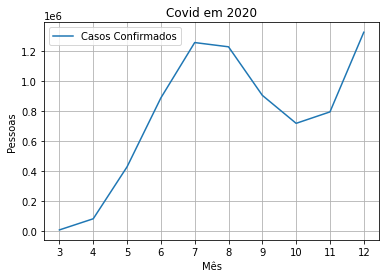

In [44]:
interval = np.arange(3,13,1)

fig, ax = plt.subplots()
ax.plot(agrupamentoCasosNovos2020.index, agrupamentoCasosNovos2020.values, label='Casos Confirmados')
ax.set_xticks(interval)
ax.set_xticks(interval, minor=True)
ax.set(xlabel='Mês', ylabel='Pessoas', title='Covid em 2020')
ax.legend()
ax.grid()

plt.show()

No ano de 2020, tivemos um decaimento de **Novos Casos Confirmados** durante o período de Agosto até Novembro, que depois começa a ter uma crescida nos casos novamente bem significativa

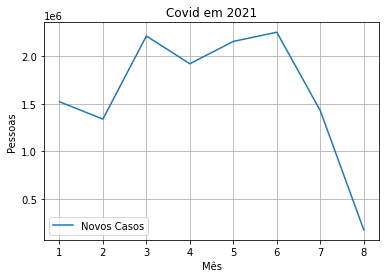

In [45]:
fig, ax = plt.subplots()
ax.plot(agrupamentoCasosNovos2021.index, agrupamentoCasosNovos2021.values, label='Novos Casos')

ax.set(xlabel='Mês', ylabel='Pessoas', title='Covid em 2021')
ax.legend()
ax.grid()

plt.show()

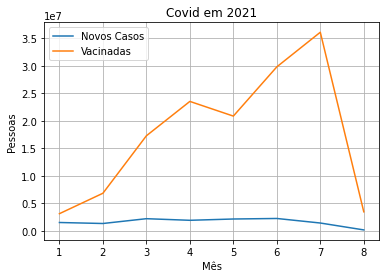

In [46]:
fig, ax = plt.subplots()
ax.plot(agrupamentoCasosNovos2021.index, agrupamentoCasosNovos2021.values, label='Novos Casos')
ax.plot(agrupamento_vacinado.index, agrupamento_vacinado.values, label='Vacinadas')

ax.set(xlabel='Mês', ylabel='Pessoas', title='Covid em 2021')
ax.legend()
ax.grid()

plt.show()

Já em 2021, podemos observar 3 quedas, porém só uma realmente é significativa, que é no mês de Junho para Julho, lembrando que de Julho para Agosto podemos desconsiderar, já que os dados coletados, tem o limite no dia 05 de Agosto, assim tendo poucos dias para ter um resultado realmente significativo de novos casos no mês.
E olhando o gráfico de **Novos Casos Confirmados** em relação a **Quantidade de Vacinas Ministradas no Mês**, a quantidade de novos casos se mantém no linear, tendo todo mês uma mesma quantidade de casos novos, só no final onde temos um pico de pessoas sendo vacinadas que temos um decaimento significativo nos novos casos de contaminação.

2) Quais estados e regiões tiveram um maior índice de casos confirmados em relação ao seu total de habitantes?

INDICE DE CASOS NOVOS EM 2020

REGIAO:

In [47]:
indice_mar_2020 = 0

if(indice_casos_novos_20.idxmax() == 0):
    print('Norte com o maior indice de novos casos em: ')
    print(indice_casos_novos_20.max())
    indice_mar_2020 = 'Norte ' + str(indice_casos_novos_20.max())
if(indice_casos_novos_20.idxmax() == 1):
    print('Nordeste com o maior indice de novos casos em: ')
    print(indice_casos_novos_20.max())
    indice_mar_2020 = 'Nordeste ' + str(indice_casos_novos_20.max())
if(indice_casos_novos_20.idxmax() == 2):
    print('Sudeste com o maior indice de novos casos em: ')
    print(indice_casos_novos_20.max())
    indice_mar_2020 = 'Suldeste ' + str(indice_casos_novos_20.max())
if(indice_casos_novos_20.idxmax() == 3):
    print('Sul com o maior indice de novos casos em: ')
    print(indice_casos_novos_20.max())
    indice_mar_2020 = 'Sul ' + str(indice_casos_novos_20.max())
if(indice_casos_novos_20.idxmax() == 4):
    print('Centro-Oeste com o maior indice de novos casos em: ')
    print(indice_casos_novos_20.max())
    indice_mar_2020 = 'Centro-Oeste ' + str(indice_casos_novos_20.max())

Centro-Oeste com o maior indice de novos casos em: 
5.381395389090489


In [48]:
tabela_estados_casos_20['estado'][tabela_estados_casos_20['taxa_casos'].idxmax()]

'RR'

In [49]:
tabela_estados_casos_20['taxa_casos'][tabela_estados_casos_20['taxa_casos'].idxmax()]

11.01358456552997

In [50]:
indice_mae_2020 = tabela_estados_casos_20['estado'][tabela_estados_casos_20['taxa_casos'].idxmax()] + ' ' +str(tabela_estados_casos_20['taxa_casos'][tabela_estados_casos_20['taxa_casos'].idxmax()])

INDICE DE CASOS NOVOS EM 2021

REGIAO:

In [51]:
indice_mar_2021 = 0

if(indice_casos_novos_21.idxmax() == 0):
    print('Norte com o maior indice de novos casos em: ')
    print(indice_casos_novos_21.max())
    indice_mar_2021 = 'Norte ' + str(indice_casos_novos_21.max())
if(indice_casos_novos_21.idxmax() == 1):
    print('Nordeste com o maior indice de novos casos em: ')
    print(indice_casos_novos_21.max())
    indice_mar_2021 = 'Nordeste ' + str(indice_casos_novos_21.max())
if(indice_casos_novos_21.idxmax() == 2):
    print('Sudeste com o maior indice de novos casos em: ')
    print(indice_casos_novos_21.max())
    indice_mar_2021 = 'Sudeste ' + str(indice_casos_novos_21.max())
if(indice_casos_novos_21.idxmax() == 3):
    print('Sul com o maior indice de novos casos em: ')
    print(indice_casos_novos_21.max())
    indice_mar_2021 = 'Sul ' + str(indice_casos_novos_21.max())
if(indice_casos_novos_21.idxmax() == 4):
    print('Centro-Oeste com o maior indice de novos casos em: ')
    print(indice_casos_novos_21.max())
    indice_mar_2021 = 'Centro-Oeste ' + str(indice_casos_novos_21.max())

Sul com o maior indice de novos casos em: 
10.042400819828023


ESTADO:

In [52]:
tabela_estados_casos_21['estado'][tabela_estados_casos_21['taxa_casos'].idxmax()]

'PR'

In [53]:
tabela_estados_casos_21['taxa_casos'][tabela_estados_casos_21['taxa_casos'].idxmax()]

12.531418475686065

In [54]:
indice_mae_2021 = tabela_estados_casos_21['estado'][tabela_estados_casos_21['taxa_casos'].idxmax()] + ' ' + str(tabela_estados_casos_21['taxa_casos'][tabela_estados_casos_21['taxa_casos'].idxmax()]) 

3) Em algum estado teve um índice de casos confirmados que seja pequeno o suficiente para se dizer que teve métodos eficazes

In [55]:
indice_mer_2020 = 0

if(indice_casos_novos_20.idxmin() == 0):
    print('Norte com o menor indice de novos casos em: ')
    print(indice_casos_novos_20.min())
    indice_mer_2020 = 'Norte ' + str(indice_casos_novos_20.min())
if(indice_casos_novos_20.idxmin() == 1):
    print('Nordeste com o menor indice de novos casos em: ')
    print(indice_casos_novos_20.min())
    indice_mer_2020 = 'Nordeste ' + str(indice_casos_novos_20.min())
if(indice_casos_novos_20.idxmin() == 2):
    print('Sudeste com o menor indice de novos casos em: ')
    print(indice_casos_novos_20.min())
    indice_mer_2020 = 'Sudeste ' + str(indice_casos_novos_20.min())
if(indice_casos_novos_20.idxmin() == 3):
    print('Sul com o menor indice de novos casos em: ')
    print(indice_casos_novos_20.min())
    indice_mer_2020 = 'Sul ' + str(indice_casos_novos_20.min())
if(indice_casos_novos_20.idxmin() == 4):
    print('Centro-Oeste com o menor indice de novos casos em: ')
    print(indice_casos_novos_20.min())
    indice_mer_2020 = 'Centro-Oeste ' + str(indice_casos_novos_20.min())

Sudeste com o menor indice de novos casos em: 
3.040251596758526


In [56]:
indice_mer_2021 = 0

if(indice_casos_novos_21.idxmin() == 0):
    print('Norte com o menor indice de novos casos em: ')
    print(indice_casos_novos_21.min())
    indice_mer_2021 = 'Norte ' + str(indice_casos_novos_20.min())
if(indice_casos_novos_21.idxmin() == 1):
    print('Nordeste com o menor indice de novos casos em: ')
    print(indice_casos_novos_21.min())
    indice_mer_2021 = 'Nordeste ' + str(indice_casos_novos_20.min())
if(indice_casos_novos_21.idxmin() == 2):
    print('Sudeste com o menor indice de novos casos em: ')
    print(indice_casos_novos_21.min())
    indice_mer_2021 = 'Sudeste ' + str(indice_casos_novos_20.min())
if(indice_casos_novos_21.idxmin() == 3):
    print('Sul com o menor indice de novos casos em: ')
    print(indice_casos_novos_21.min())
    indice_mer_2021 = 'Sul ' + str(indice_casos_novos_20.min())
if(indice_casos_novos_21.idxmin() == 4):
    print('Centro-Oeste com o menor indice de novos casos em: ')
    print(indice_casos_novos_21.min())
    indice_mer_2021 = 'Centro-Oeste ' + str(indice_casos_novos_20.min())

Norte com o menor indice de novos casos em: 
5.092073892757583


In [57]:
tabela_estados_casos_20['estado'][tabela_estados_casos_20['taxa_casos'].idxmin()]
tabela_estados_casos_20['taxa_casos'][tabela_estados_casos_20['taxa_casos'].idxmin()]
indice_mee_2020 = tabela_estados_casos_20['estado'][tabela_estados_casos_20['taxa_casos'].idxmin()] + ' ' + str(tabela_estados_casos_20['taxa_casos'][tabela_estados_casos_20['taxa_casos'].idxmin()])
tabela_estados_casos_21['estado'][tabela_estados_casos_21['taxa_casos'].idxmin()]
tabela_estados_casos_21['taxa_casos'][tabela_estados_casos_21['taxa_casos'].idxmin()]
indice_mee_2021 = tabela_estados_casos_21['estado'][tabela_estados_casos_21['taxa_casos'].idxmin()] + ' ' + str(tabela_estados_casos_21['taxa_casos'][tabela_estados_casos_21['taxa_casos'].idxmin()]) 

Maior taxa para Estado e Região

In [58]:
print('2020:')
print(indice_mar_2020)
print(indice_mae_2020)
print('2021:')
print(indice_mar_2021)
print(indice_mae_2021)

2020:
Centro-Oeste 5.381395389090489
RR 11.01358456552997
2021:
Sul 10.042400819828023
PR 12.531418475686065


Menor taxa para Estado e Região

In [59]:
print('2020:')
print(indice_mer_2020)
print(indice_mee_2020)
print('2021:')
print(indice_mer_2021)
print(indice_mee_2021)

2020:
Sudeste 3.040251596758526
PE 2.329604959511131
2021:
Norte 3.040251596758526
MA 2.1496552526359394


Observado as taxas de **Casos Novos** em estados, não temos uma grande variação na taxa que seja significativo para um estado ter um controle significativo de disseminação do vírus, porém, quando olhamos as taxas em regiões, temos uma variação de 10% nas taxas, podendo observar que alguma região pode ter número que sejam significativos para tentar estudar os meios utilizados para o controle da disseminação do vírus, porém, com outras regiões com taxas maiores, acaba que estabilizando as taxas comparativas de cada estado.

4) Como é o gráfico ao longo do tempo de casos confirmados e de óbitos? Existe algum comportamento semelhante entre os dois?

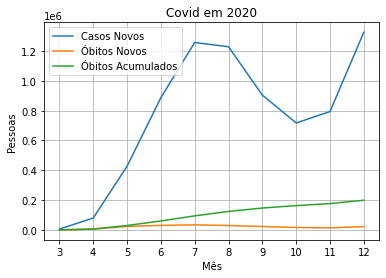

In [60]:
interval = np.arange(3,13,1)

fig, ax = plt.subplots()
ax.plot(agrupamentoCasosNovos2020.index, agrupamentoCasosNovos2020.values, label='Casos Novos')
ax.plot(agrupamentoObitos2020.index, agrupamentoObitos2020.values, label='Óbitos Novos')
ax.plot(agrupamentoObitosAcumulados2020['mes'], agrupamentoObitosAcumulados2020['obitosAcumulados'], label='Óbitos Acumulados')

ax.set_xticks(interval)
ax.set_xticks(interval, minor=True)
ax.set(xlabel='Mês', ylabel='Pessoas', title='Covid em 2020')
ax.legend()
ax.grid()

plt.show()

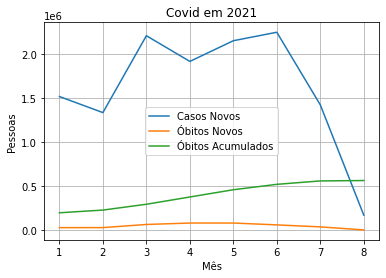

In [61]:
interval = np.arange(1,9,1)

fig, ax = plt.subplots()
ax.plot(agrupamentoCasosNovos2021.index, agrupamentoCasosNovos2021.values, label='Casos Novos')
ax.plot(agrupamentoObitos2021.index, agrupamentoObitos2021.values, label='Óbitos Novos')
ax.plot(agrupamentoObitosAcumulados2021['mes'], agrupamentoObitosAcumulados2021['obitosAcumulados'], label='Óbitos Acumulados')

ax.set_xticks(interval)
ax.set_xticks(interval, minor=True)
ax.set(xlabel='Mês', ylabel='Pessoas', title='Covid em 2021')
ax.legend()
ax.grid()

plt.show()

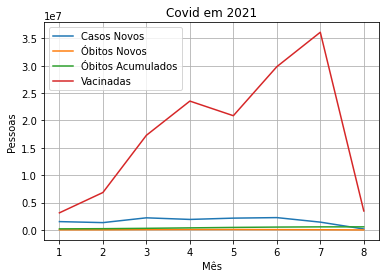

In [62]:
interval = np.arange(1,9,1)

fig, ax = plt.subplots()
ax.plot(agrupamentoCasosNovos2021.index, agrupamentoCasosNovos2021.values, label='Casos Novos')
ax.plot(agrupamentoObitos2021.index, agrupamentoObitos2021.values, label='Óbitos Novos')
ax.plot(agrupamentoObitosAcumulados2021['mes'], agrupamentoObitosAcumulados2021['obitosAcumulados'], label='Óbitos Acumulados')
ax.plot(agrupamento_vacinado.index, agrupamento_vacinado.values, label='Vacinadas')

ax.set_xticks(interval)
ax.set_xticks(interval, minor=True)
ax.set(xlabel='Mês', ylabel='Pessoas', title='Covid em 2021')
ax.legend()
ax.grid()

plt.show()